In [426]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'realestate.csv'
df = pd.read_csv(file_path, index_col=False, low_memory=False,)

# EDA

In [427]:
df.head(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 997213 entries, 0 to 997212
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   serial_number     997213 non-null  int64  
 1   list_year         997213 non-null  int64  
 2   date_recorded     997213 non-null  object 
 3   town              997213 non-null  object 
 4   address           997213 non-null  object 
 5   assessed_value    997213 non-null  int64  
 6   sale_amount       997213 non-null  float64
 7   sales_ratio       997213 non-null  float64
 8   property_type     997213 non-null  object 
 9   residential_type  997213 non-null  object 
 10  years_until_sold  997213 non-null  int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 83.7+ MB


(   serial_number  list_year date_recorded     town                address  \
 0        2020348       2020     9/13/2021  Ansonia        230 WAKELEE AVE   
 1          20002       2020     10/2/2020  Ashford        390 TURNPIKE RD   
 2         200212       2020      3/9/2021     Avon       5 CHESTNUT DRIVE   
 3         200243       2020     4/13/2021     Avon  111 NORTHINGTON DRIVE   
 4         200377       2020      7/2/2021     Avon     70 FAR HILLS DRIVE   
 
    assessed_value  sale_amount  sales_ratio property_type residential_type  \
 0          150500     325000.0       0.4630    Commercial              Nan   
 1          253000     430000.0       0.5883   Residential    Single Family   
 2          130400     179900.0       0.7248   Residential            Condo   
 3          619290     890000.0       0.6958   Residential    Single Family   
 4          862330    1447500.0       0.5957   Residential    Single Family   
 
    years_until_sold  
 0                 1  
 1      

In [428]:
df.describe()

,serial_number,list_year,assessed_value,sale_amount,sales_ratio,years_until_sold
count,9.972130e+05,997213.000000,9.972130e+05,9.972130e+05,9.972130e+05,997213.000000
mean,4.311864e+05,2010.189829,2.791437e+05,3.911512e+05,1.044637e+01,0.750900
std,6.549219e+06,6.237877,1.670610e+06,5.347270e+06,1.890192e+03,0.434742
min,0.000000e+00,2001.000000,0.000000e+00,0.000000e+00,0.000000e+00,-18.000000
25%,3.044400e+04,2004.000000,8.760000e+04,1.400000e+05,4.867000e-01,1.000000
50%,7.030300e+04,2010.000000,1.383900e+05,2.250000e+05,6.246000e-01,1.000000
75%,1.518780e+05,2016.000000,2.255600e+05,3.650000e+05,7.852761e-01,1.000000
max,2.000500e+09,2020.000000,8.815100e+08,5.000000e+09,1.226420e+06,4.000000


In [429]:
df['property_type'].unique()

array(['Commercial', 'Residential', 'Vacant Land', 'Nan', 'Apartments',
       'Industrial', 'Public Utility', 'Condo', 'Two Family',
       'Three Family', 'Single Family', 'Four Family'], dtype=object)

In [430]:
df['residential_type'].unique()

array(['Nan', 'Single Family', 'Condo', 'Two Family', 'Three Family',
       'Four Family'], dtype=object)

In [431]:
town_counts = len(df['town'].unique())
town_counts

170

## Kontrola chybějících hodnot

In [432]:
df.isnull().sum()

,0
serial_number,0
list_year,0
date_recorded,0
town,0
address,0
assessed_value,0
sale_amount,0
sales_ratio,0
property_type,0
residential_type,0


## Kontrola zduplikovaných hodnot

In [433]:
df.duplicated().sum()

0

## Datové typy

In [434]:
df.dtypes

,0
serial_number,int64
list_year,int64
date_recorded,object
town,object
address,object
assessed_value,int64
sale_amount,float64
sales_ratio,float64
property_type,object
residential_type,object


| Název sloupce | Datový typ | Stručný popis |
| --------      | -------    |-------        |
| serial_number | int64   |Unikátní číslo nemovitosti.|
| list_year | int64 | Rok, kdy byla nemovitost zařazena do seznamu.
| date_recorded | object | Datum, kdy byl záznam proveden
| town | object | Název města, kde se nemovitost nachází.
| address | object | Adresa nemovitosti.
|assessed_value | int64 | Odhadovaná hodnota nemovitosti
| sale_amount | float64 |Skutečná částka, za kterou byla nemovitost prodána.
| sales_ratio | float64 | Poměr odhadované hodnoty a skutečné prodejní částky.
| property_type | object | Typ nemovitosti (komerční, rezidenční atd.)
|residential_type | object | Typ rezidenční nemovitosti
| years_until_sold | int64 | Počet let, které uplynuly od zařazení nemovitosti na seznam do jejího prodeje.


## Zjištění unikátních hodnot

In [435]:
df.nunique()

,0
serial_number,83537
list_year,20
date_recorded,6387
town,170
address,714372
assessed_value,91378
sale_amount,57372
sales_ratio,547044
property_type,12
residential_type,6


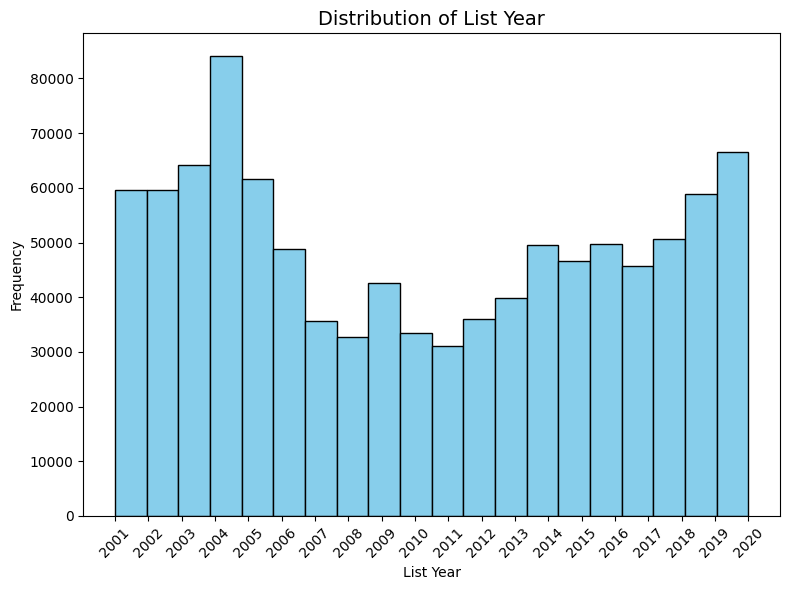

In [436]:
# Plot histogram for 'list_year'
plt.figure(figsize=(8, 6))
data = df['list_year'].dropna()  # Remove NaN values
plt.hist(data, bins=len(data.unique()), color='skyblue', edgecolor='black', align='mid')

# Set x-axis ticks to show whole numbers
plt.xticks(sorted(data.unique()), rotation=45)  # Sort to ensure proper order
plt.title('Distribution of List Year', fontsize=14)
plt.xlabel('List Year')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

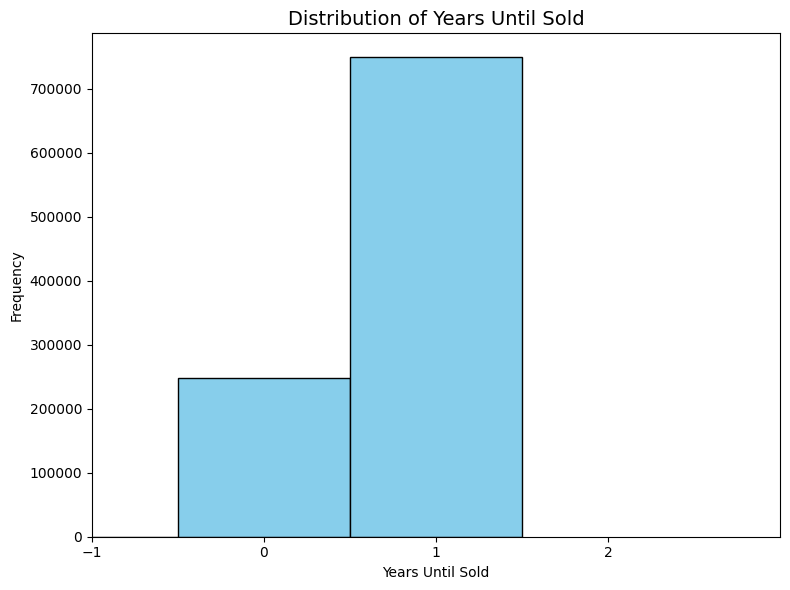

In [437]:
min_val = -1
max_val = 3

plt.figure(figsize=(8, 6))
data = df['years_until_sold'].dropna()

bins = range(min_val, max_val)
plt.hist(data, bins=bins, color='skyblue', edgecolor='black', align='left')

plt.xticks(range(min_val, max_val), rotation=0)
plt.xlim(min_val, max_val)

plt.title('Distribution of Years Until Sold', fontsize=14)
plt.xlabel('Years Until Sold')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


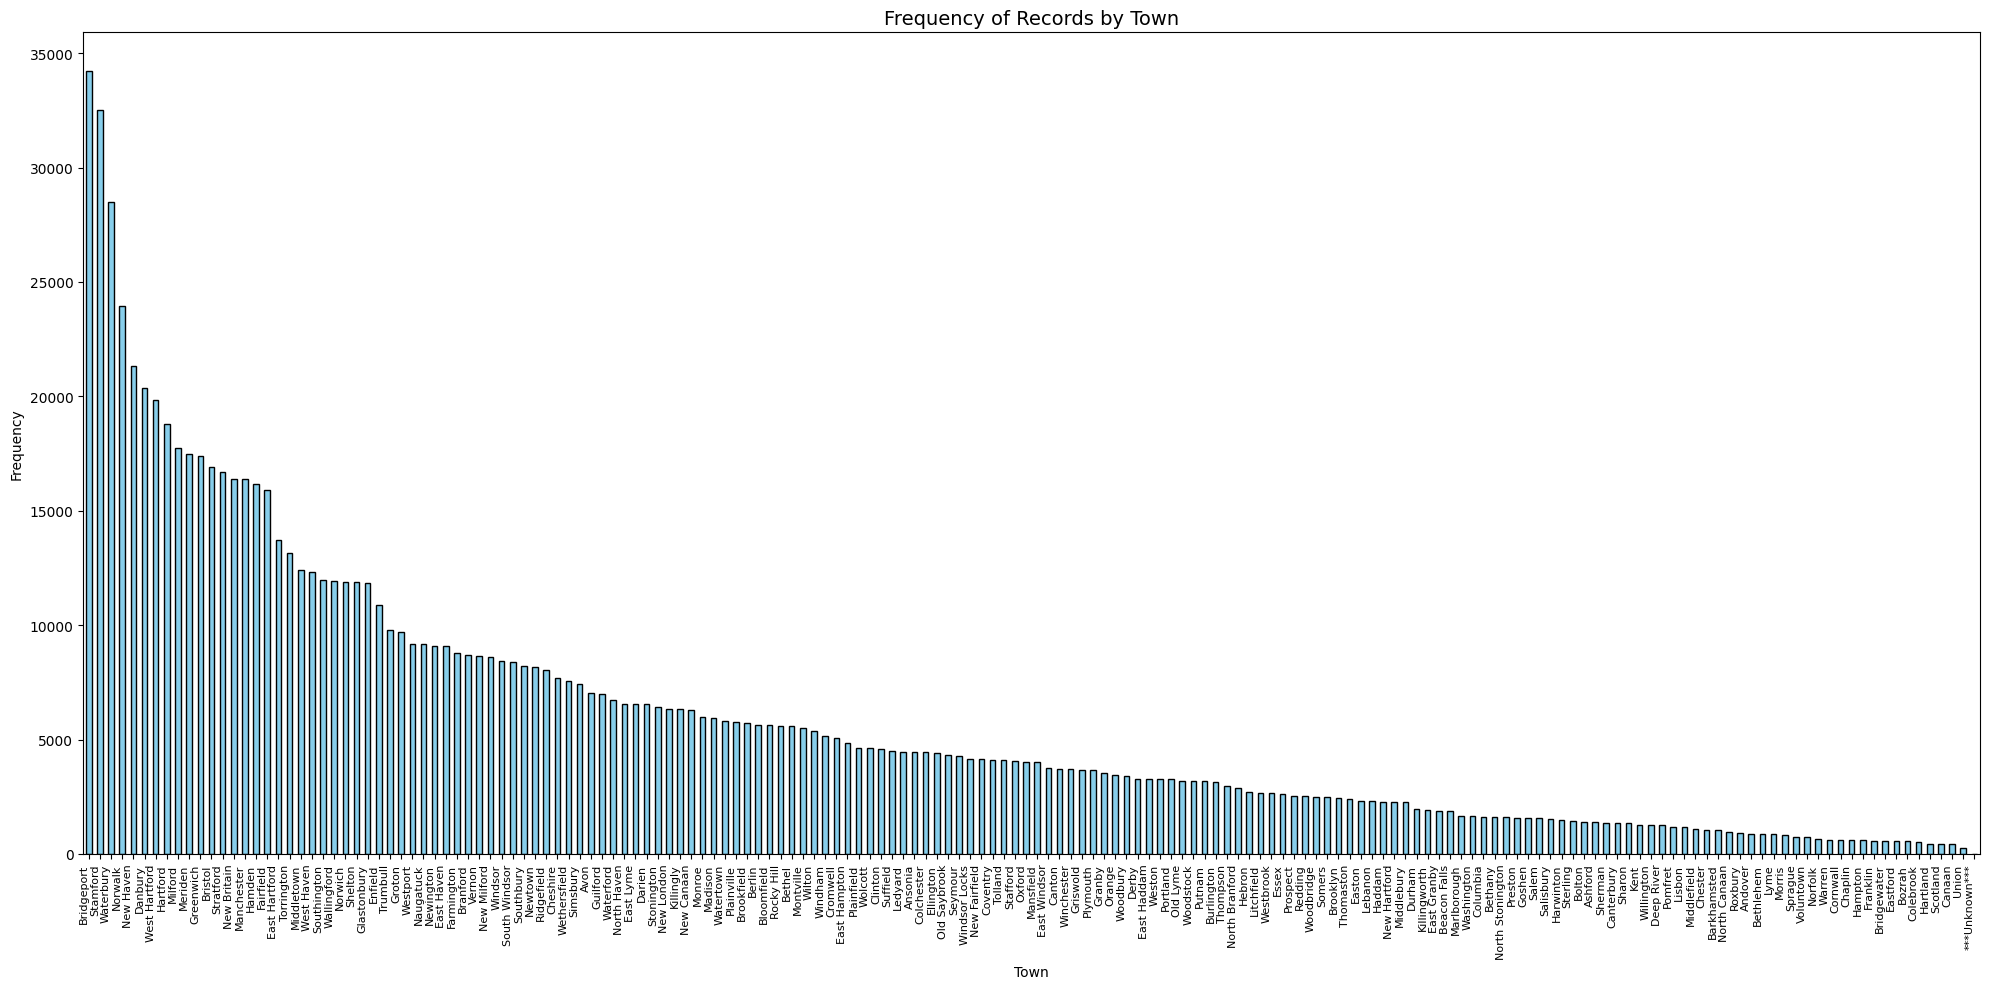

In [438]:
plt.figure(figsize=(20, 10))
data = df['town'].dropna()

town_counts = data.value_counts()

town_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Frequency of Records by Town', fontsize=14)
plt.xlabel('Town')
plt.ylabel('Frequency')
plt.xticks(rotation=90, ha='right', fontsize=8)

plt.tight_layout()
plt.show()


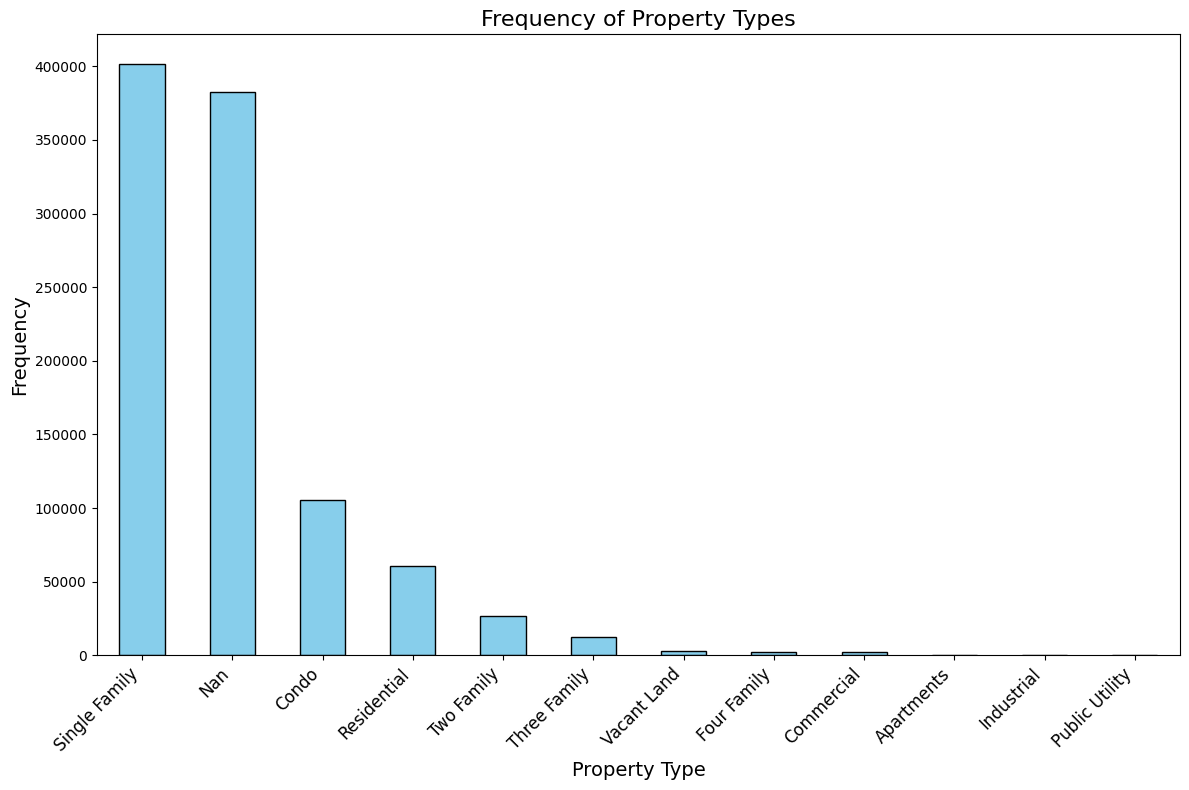

In [439]:
plt.figure(figsize=(12, 8))
property_type_counts = df['property_type'].dropna().value_counts()
property_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Frequency of Property Types', fontsize=16)
plt.xlabel('Property Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()


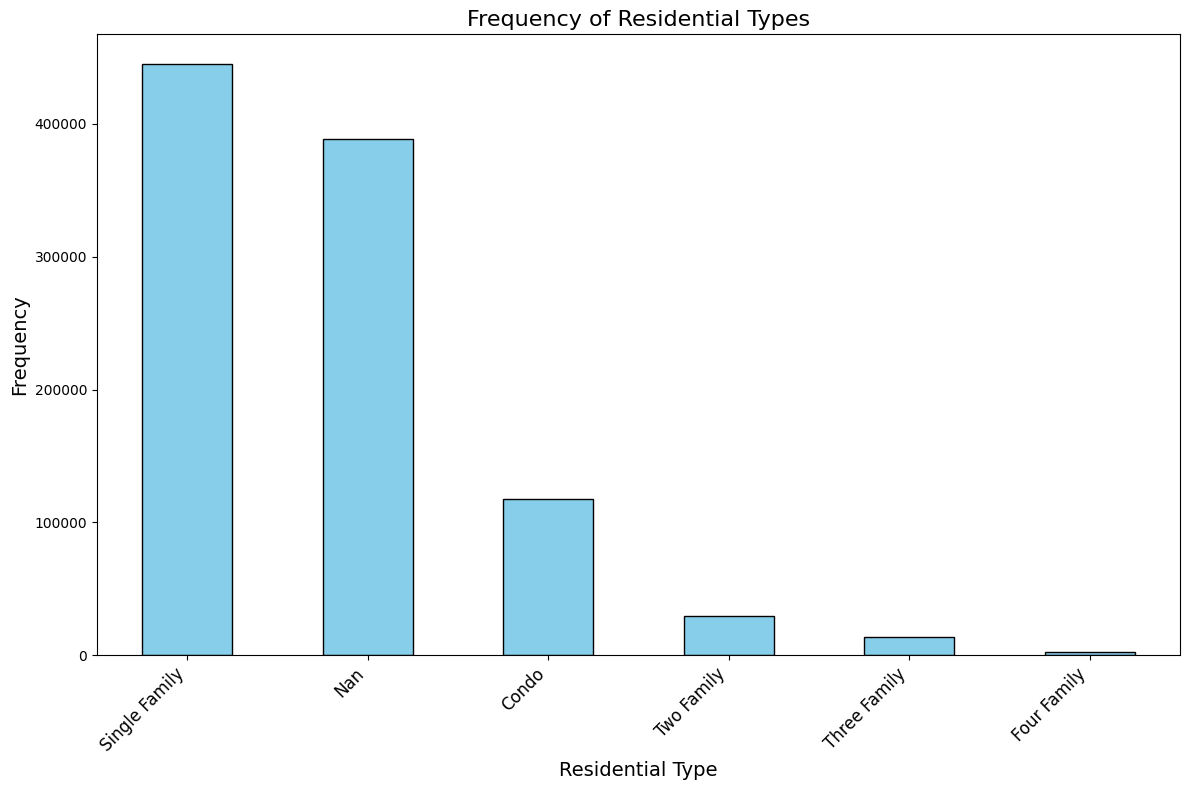

In [440]:
plt.figure(figsize=(12, 8))
residential_type_counts = df['residential_type'].dropna().value_counts()
residential_type_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Frequency of Residential Types', fontsize=16)
plt.xlabel('Residential Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()
plt.show()

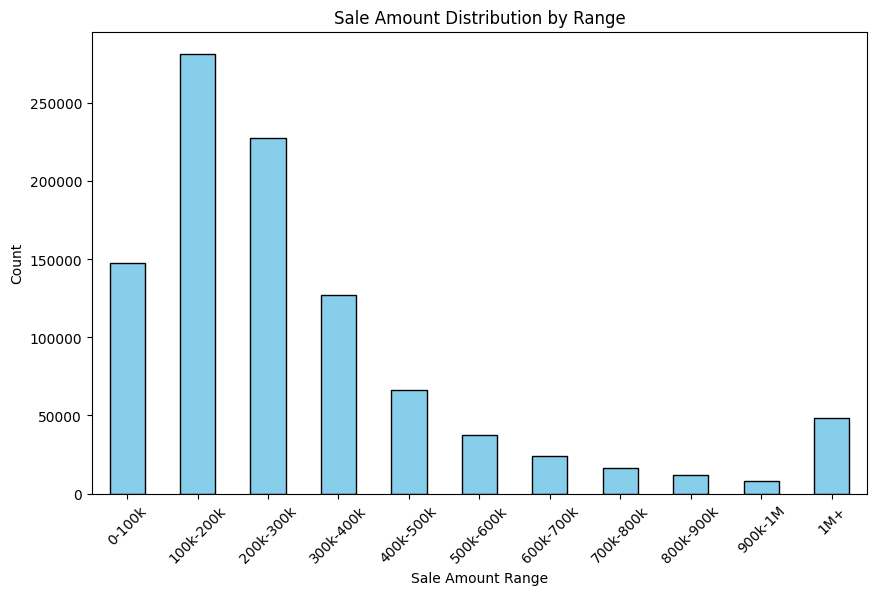

In [441]:
bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, float('inf')]
bin_labels = ['0-100k', '100k-200k', '200k-300k', '300k-400k', '400k-500k', '500k-600k',
              '600k-700k', '700k-800k', '800k-900k', '900k-1M', '1M+']

df['sale_amount_range'] = pd.cut(df['sale_amount'], bins=bins, labels=bin_labels, right=False)

plt.figure(figsize=(10,6))
df['sale_amount_range'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sale Amount Distribution by Range')
plt.xlabel('Sale Amount Range')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
df = df.drop('sale_amount_range', axis=1)

TODO popsat všechny grafy

# Pre-processing

In [442]:
# Convert 'date_recorded' to datetime format
df['date_recorded'] = pd.to_datetime(df['date_recorded'], errors='coerce')

# Extract year from the date
df['year_recorded'] = df['date_recorded'].dt.year

In [443]:
# prompt: drop attribute address
df = df.drop('address', axis=1)

In [444]:
# One-hot encode the 'property_type' column
df = pd.get_dummies(df, columns=['property_type'], prefix='property_type')

In [445]:
# One-hot encode the 'property_type' column
df = pd.get_dummies(df, columns=['residential_type'], prefix='residential_type')

In [446]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['town'] = label_encoder.fit_transform(df['town'])

In [447]:
# Filter rows where 'property_type' is 'Single Family'
condo_df = df[df['property_type_Condo'] == True]

# Show the filtered dataframe
condo_df

,serial_number,list_year,date_recorded,town,assessed_value,sale_amount,sales_ratio,years_until_sold,year_recorded,property_type_Apartments,...,property_type_Single Family,property_type_Three Family,property_type_Two Family,property_type_Vacant Land,residential_type_Condo,residential_type_Four Family,residential_type_Nan,residential_type_Single Family,residential_type_Three Family,residential_type_Two Family
67070,60228,2006,2007-07-05,9,120960,250000.0,0.483840,1,2007,False,...,False,False,False,False,True,False,False,False,False,False
67075,60075,2006,2007-04-05,50,143400,339500.0,0.422386,1,2007,False,...,False,False,False,False,True,False,False,False,False,False
67080,60416,2006,2007-05-25,96,221970,340000.0,0.652853,1,2007,False,...,False,False,False,False,True,False,False,False,False,False
67083,60537,2006,2007-08-31,14,118800,210000.0,0.565714,1,2007,False,...,False,False,False,False,True,False,False,False,False,False
67085,60421,2006,2007-05-08,54,84000,174000.0,0.482759,1,2007,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997168,1900695,2019,2020-02-24,135,188410,379000.0,0.497124,1,2020,False,...,False,False,False,False,True,False,False,False,False,False
997171,190079,2019,2020-03-06,115,8750,356021.0,0.024600,1,2020,False,...,False,False,False,False,True,False,False,False,False,False
997177,190285,2019,2020-05-18,159,95760,130900.0,0.731600,1,2020,False,...,False,False,False,False,True,False,False,False,False,False
997191,190095,2019,2019-12-09,164,176890,257500.0,0.687000,0,2019,False,...,False,False,False,False,True,False,False,False,False,False


In [448]:
filtered_df = condo_df[(condo_df['property_type_Condo'] == True) & (condo_df['residential_type_Condo'] == False)]

filtered_df

,serial_number,list_year,date_recorded,town,assessed_value,sale_amount,sales_ratio,years_until_sold,year_recorded,property_type_Apartments,...,property_type_Single Family,property_type_Three Family,property_type_Two Family,property_type_Vacant Land,residential_type_Condo,residential_type_Four Family,residential_type_Nan,residential_type_Single Family,residential_type_Three Family,residential_type_Two Family


Po analýze atributů residential_type a property type jsem se rozhodl smazat atribut residential_type, protože není podstatný pro další analýzu či shlukování. Ověřeno kódem výše. (Toto bylo ověřeno nejen pro typ "Condo" , ale i pro ostatní typy.)

In [449]:
# prompt: drop all columns where name include residential_type

# Drop columns containing 'residential_type' in their name
df = df.drop(columns=[col for col in df.columns if 'residential_type' in col])

In [450]:
# prompt: drop date_recorded

df = df.drop('date_recorded', axis=1)

In [451]:
df = df.drop('serial_number',axis=1)

In [452]:
# prompt: rename property_type_Nan to other

# Rename the column
df = df.rename(columns={'property_type_Nan': 'property_type_other'})

In [453]:
# prompt: if it is property_type_Single Family or
# property_type_Three Family or
# property_type_Two Family or
# property_type_Four_Family
# create a new column property_type_Family

# Create 'property_type_Family' column
df['property_type_Family'] = (
    (df['property_type_Single Family'] == 1) |
    (df['property_type_Three Family'] == 1) |
    (df['property_type_Two Family'] == 1) |
    (df['property_type_Four Family'] == 1)
).astype(int)

In [478]:
# prompt: convert property_type_Family to bool

# The 'property_type_Family' column is already created as an integer (0 or 1)
# representing True or False.  No further conversion is needed.

# If you *really* need a boolean type:
df['property_type_Family'] = df['property_type_Family'].astype(bool)

In [454]:
# prompt: delete columns: property_type_Single Family, property_type_Three Family, property_type_Two Family, property_type_Four_Family

# Drop the specified columns
df = df.drop(columns=['property_type_Single Family', 'property_type_Three Family', 'property_type_Two Family', 'property_type_Four Family'])

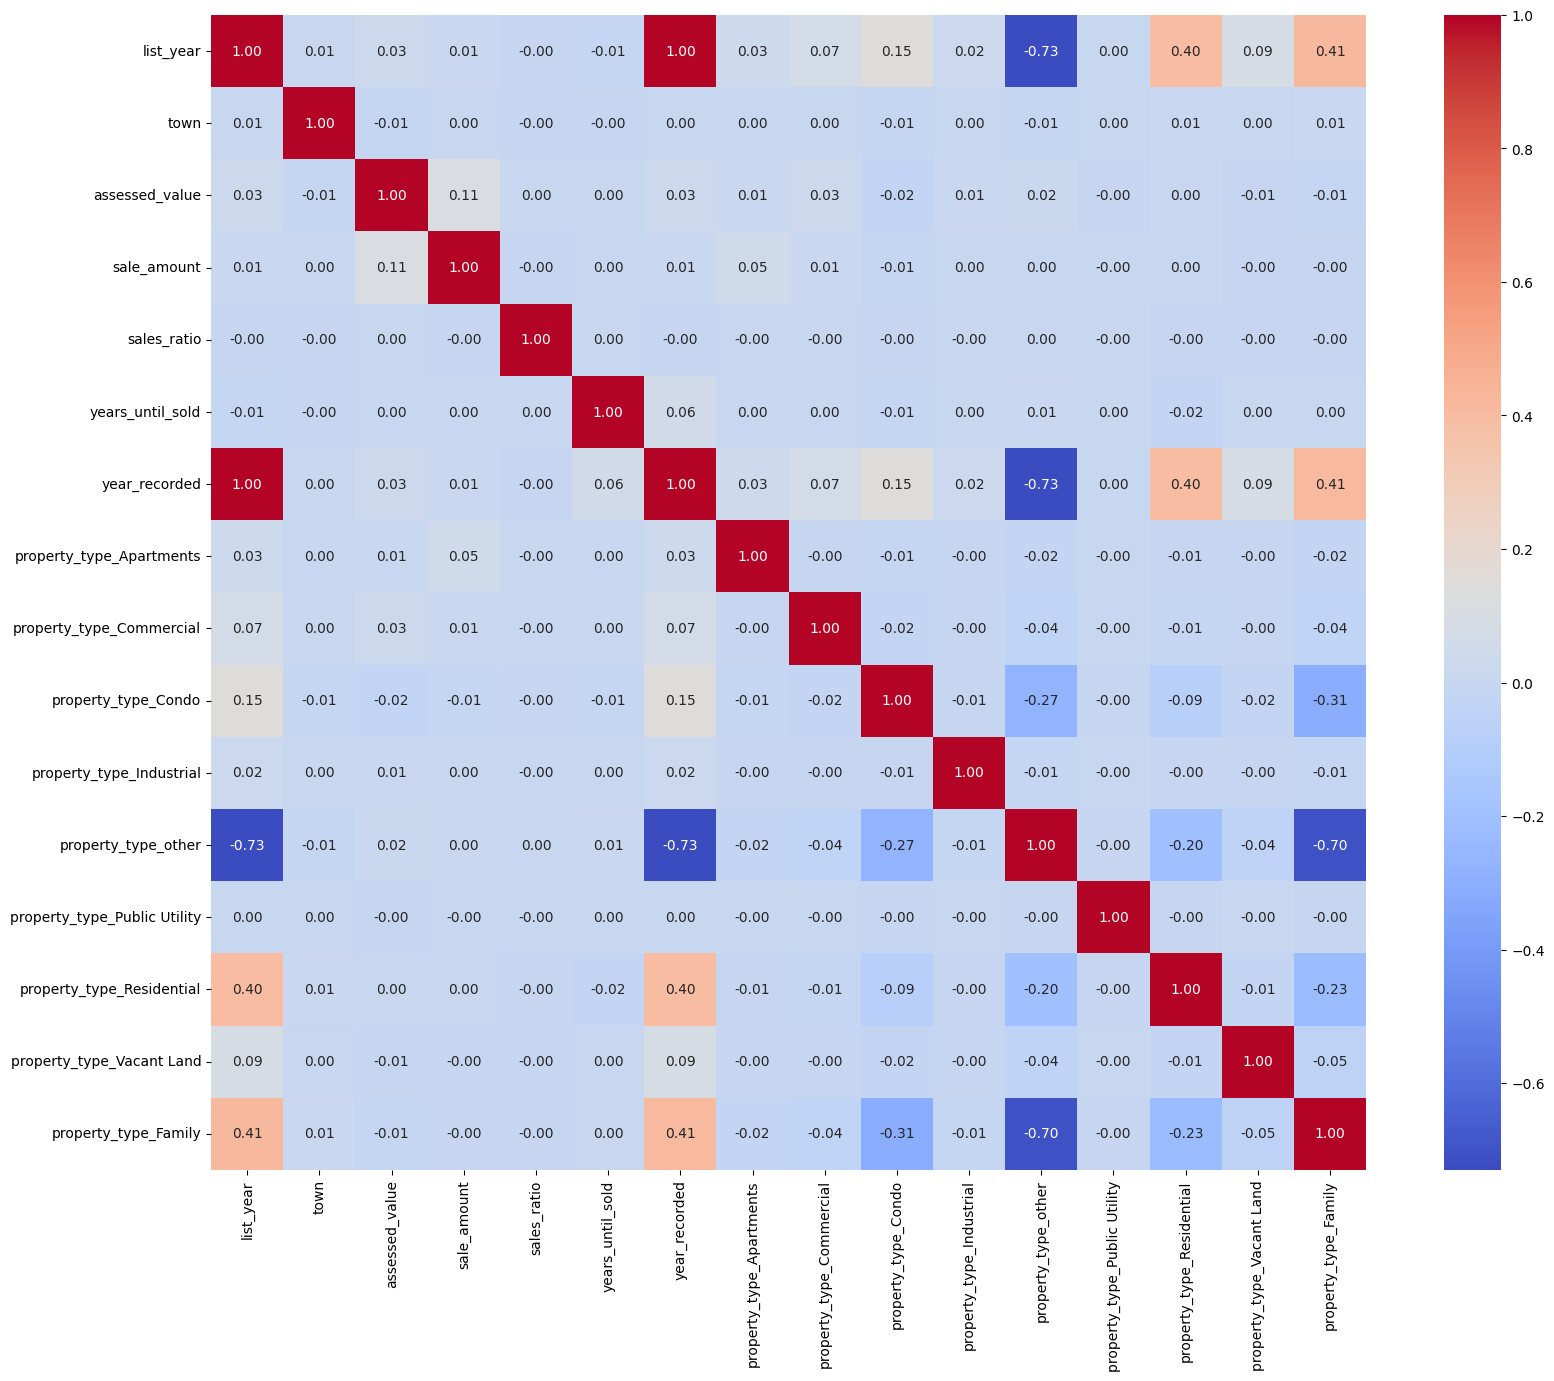

In [464]:
corr_mat = df.corr()

plt.figure(figsize=(20, 15))
sns.heatmap(corr_mat, cmap='coolwarm', square=True, annot=True, fmt='.2f')

plt.show()

# 1. Metoda shlukování (K-means)

In [480]:
X_test

,list_year,town,assessed_value,sales_ratio,year_recorded,property_type_Apartments,property_type_Commercial,property_type_Condo,property_type_Industrial,property_type_other,property_type_Public Utility,property_type_Residential,property_type_Vacant Land,property_type_Family,cluster_id
972291,2019,83,41380,0.729900,2020,False,False,False,False,True,False,False,False,0,0
580711,2010,15,120990,2.372353,2011,False,False,False,False,False,False,False,False,1,0
768231,2015,14,71500,0.680952,2016,False,False,True,False,False,False,False,False,0,0
205832,2003,40,127640,0.536303,2004,False,False,False,False,True,False,False,False,0,0
674744,2013,27,19300,1.930000,2014,False,False,False,False,False,False,False,False,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580162,2010,105,69800,0.775556,2011,False,False,False,False,True,False,False,False,0,0
87576,2001,9,134160,0.421887,2002,False,False,False,False,True,False,False,False,0,0
685557,2013,91,233800,0.899231,2013,False,False,False,False,False,False,False,False,1,0
697405,2014,57,3861900,0.657345,2015,False,False,False,False,False,False,False,False,1,0


In [479]:
X_test.dtypes

,0
list_year,int64
town,int64
assessed_value,int64
sales_ratio,float64
year_recorded,int32
property_type_Apartments,bool
property_type_Commercial,bool
property_type_Condo,bool
property_type_Industrial,bool
property_type_other,bool


In [457]:
from sklearn.model_selection import train_test_split

# Assuming your target variables are 'sale_amount', 'list_year', and 'assessed_value'
features = ['sale_amount','years_until_sold']
X = df.drop(features, axis=1)  # Drop the target columns from the features
y = df[features]  # Select the target columns

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Now you have X_train, X_test, y_train, and y_test
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(698049, 14) (299164, 14) (698049, 2) (299164, 2)


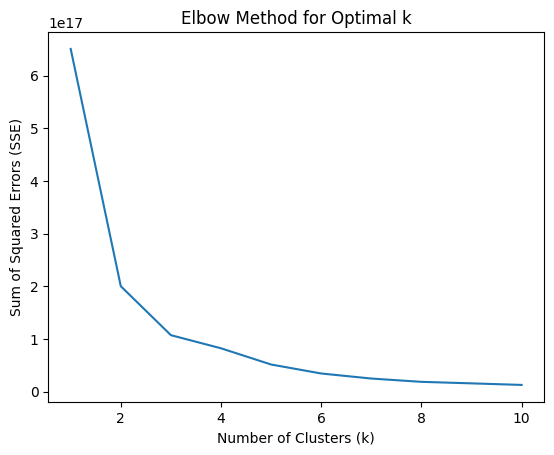

In [458]:
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_test)
    sse.append(kmeans.inertia_)


plt.plot(range(1, 11), sse)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

In [459]:
import sklearn.cluster
clusters = sklearn.cluster.KMeans(n_clusters=3, random_state=13).fit(X_test)
X_test['cluster_id'] = clusters.labels_

In [460]:
# Assuming X_test['cluster_id'] contains the cluster labels
cluster_counts = X_test['cluster_id'].value_counts()
cluster_counts

,count
cluster_id,
0,298248
2,759
1,157


## Explorace clusterů

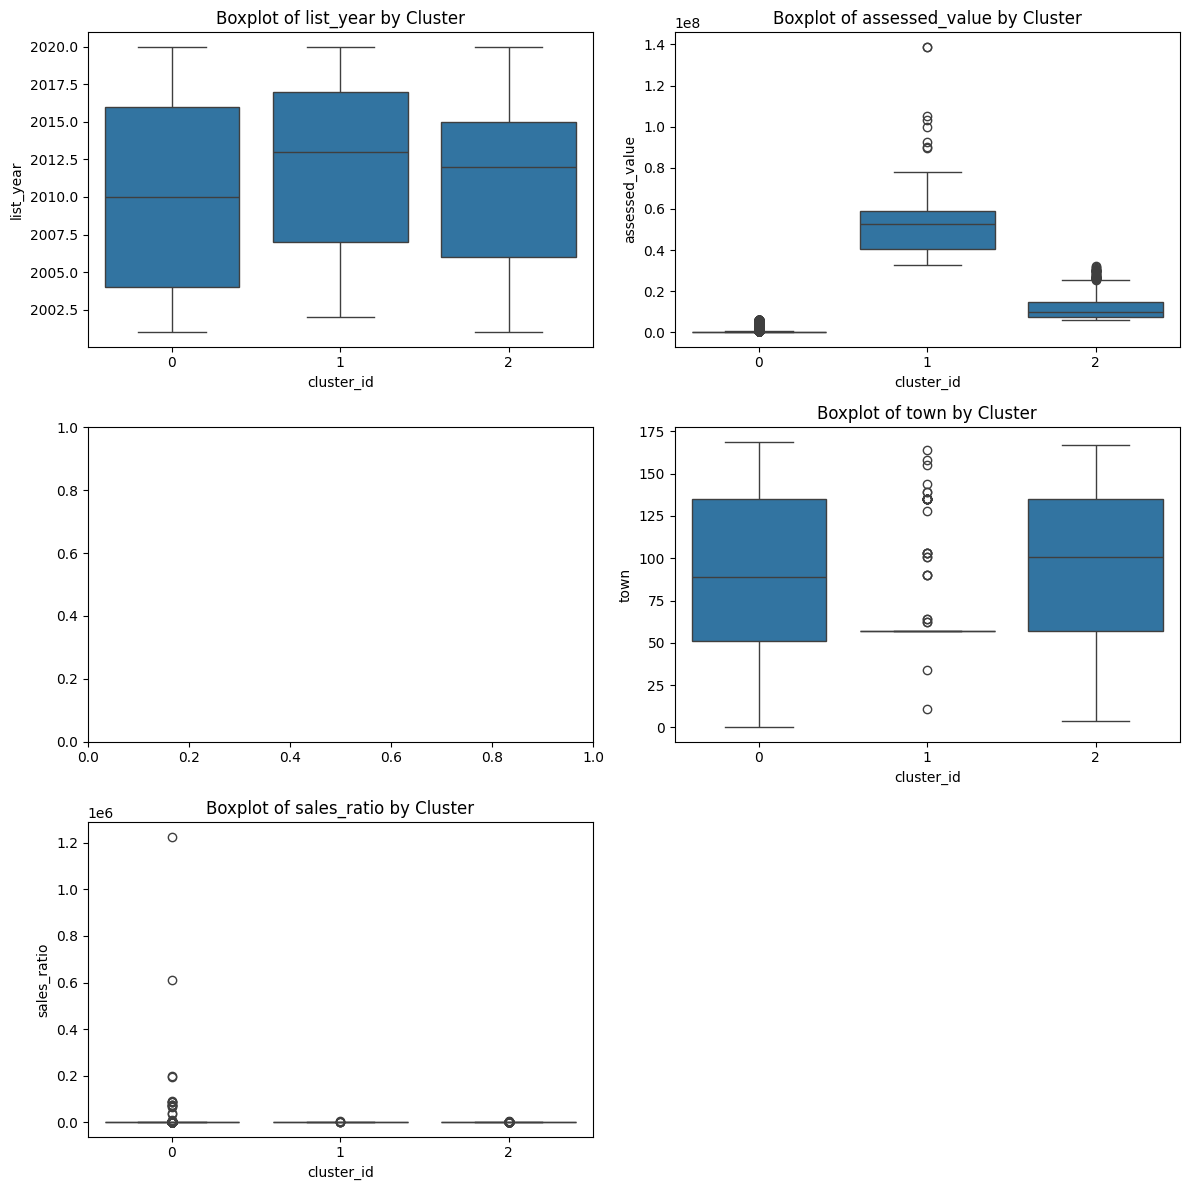

In [476]:
attributes = ['list_year','assessed_value','sale_amount','town','sales_ratio']

num_attributes = len(attributes)
num_rows = (num_attributes + 1) // 2

fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

axes = axes.flatten()

for i, attribute in enumerate(attributes):
    # Check if the column exists in X_test before plotting
    if attribute in X_test.columns:
        sns.boxplot(x='cluster_id', y=attribute, data=X_test, ax=axes[i])
        axes[i].set_title(f'Boxplot of {attribute} by Cluster')
    else:
        print(f"Warning: Column '{attribute}' not found in X_test. Skipping boxplot.")

if num_attributes % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# 2. metoda shlukování (DBSCAN)

# 3. metoda shlukování (Agglomerative Clustering)